## Mismanagement of Plastic waste

Mismanaged Plastic Waste is very serious problem for not only human but also any other animals and whole ecosystem. So I tried analysis of data which includes total mismanaged plastic waste by countries and mismanaged plastic waster per capita in 2010 and 2019.

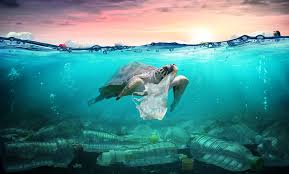

1. Importing
2. Feature Engineering
3. Visualization & Global Mapping
4. EDA
5. Clustering
6. The future of plastic waste

### 1. Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
!pip install plotly


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'C:\Users\Jagruti\Downloads\mismanaged_plasticwaste.csv')

In [5]:
df.head()

Country  Total_MismanagedPlasticWaste_2010 (millionT)  \
0              Albania                                         29705   
1              Algeria                                        520555   
2               Angola                                         62528   
3             Anguilla                                            52   
4  Antigua and Barbuda                                          1253   

   Total_MismanagedPlasticWaste_2019 (millionT)  \
0                                         69833   
1                                        764578   
2                                        236946   
3                                             0   
4                                           627   

   Mismanaged_PlasticWaste_PerCapita_2010 (kg per year)   \
0                                              0.032       
1                                              0.086       
2                                              0.045       
3                                              0.010       
4                                              0.051       

   Mismanaged_PlasticWaste_PerCapita_2019 (kg per year)   
0                                          24.239153      
1                                          17.758995      
2                                           7.445279      
3                                           0.000000      
4                                           6.463918

In [6]:
df.shape

(194, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country                                                194 non-null    object 
 1   Total_MismanagedPlasticWaste_2010 (millionT)           194 non-null    int64  
 2   Total_MismanagedPlasticWaste_2019 (millionT)           194 non-null    int64  
 3   Mismanaged_PlasticWaste_PerCapita_2010 (kg per year)   194 non-null    float64
 4   Mismanaged_PlasticWaste_PerCapita_2019 (kg per year)   194 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.7+ KB


In [8]:
df.isnull().sum()

Country                                                  0
Total_MismanagedPlasticWaste_2010 (millionT)             0
Total_MismanagedPlasticWaste_2019 (millionT)             0
Mismanaged_PlasticWaste_PerCapita_2010 (kg per year)     0
Mismanaged_PlasticWaste_PerCapita_2019 (kg per year)     0
dtype: int64

### 2. Feature Engineering

Renaming the columns

In [9]:

df=df.rename(columns={'Total_MismanagedPlasticWaste_2010 (millionT)': 'Total_mT_2010',
                      'Total_MismanagedPlasticWaste_2019 (millionT)': 'Total_mT_2019',
                      'Mismanaged_PlasticWaste_PerCapita_2010 (kg per year) ':'PerCapita_kg_2010',
                      'Mismanaged_PlasticWaste_PerCapita_2019 (kg per year) ':'PerCapita_kg_2019'})

Getting country codes for mapping

In [10]:
!pip install pycountry


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pycountry

In [12]:
def findCountry (country_code):
    try:
        return pycountry.countries.get(name=country_code).alpha_3
    except:
        return 'NaN'
df['country_code'] = df.apply(lambda row: findCountry(row.Country) , axis = 1)

In [13]:
df_no=df[df['country_code']== 'NaN']
df_no['Country'].unique()

array(['British Virgin Islands', 'Brunei', 'Cape Verde',
       'Channel Islands', 'Cocos Islands', "Cote d'Ivoire", 'Curacao',
       'Democratic Republic of Congo', 'Faeroe Islands',
       'Falkland Islands', 'Iran', 'Macau', 'Micronesia',
       'Netherlands Antilles', 'North Korea', 'Palestine', 'Reunion',
       'Russia', 'Saint Helena', 'Saint Martin', 'Sint Maarten',
       'South Korea', 'Syria', 'Taiwan', 'Tanzania', 'Timor', 'Venezuela',
       'Vietnam'], dtype=object)

In [14]:
pd.set_option('display.max_rows', 200)


In [15]:
np.array(df[['Country','country_code']])

array([['Albania', 'ALB'],
       ['Algeria', 'DZA'],
       ['Angola', 'AGO'],
       ['Anguilla', 'AIA'],
       ['Antigua and Barbuda', 'ATG'],
       ['Argentina', 'ARG'],
       ['Aruba', 'ABW'],
       ['Australia', 'AUS'],
       ['Bahamas', 'BHS'],
       ['Bahrain', 'BHR'],
       ['Bangladesh', 'BGD'],
       ['Barbados', 'BRB'],
       ['Belgium', 'BEL'],
       ['Belize', 'BLZ'],
       ['Benin', 'BEN'],
       ['Bermuda', 'BMU'],
       ['Bosnia and Herzegovina', 'BIH'],
       ['Brazil', 'BRA'],
       ['British Virgin Islands', 'NaN'],
       ['Brunei', 'NaN'],
       ['Bulgaria', 'BGR'],
       ['Burkina Faso', 'BFA'],
       ['Cambodia', 'KHM'],
       ['Cameroon', 'CMR'],
       ['Canada', 'CAN'],
       ['Cape Verde', 'NaN'],
       ['Cayman Islands', 'CYM'],
       ['Channel Islands', 'NaN'],
       ['Chile', 'CHL'],
       ['China', 'CHN'],
       ['Christmas Island', 'CXR'],
       ['Cocos Islands', 'NaN'],
       ['Colombia', 'COL'],
       ['Comoros', 'COM'],
  

In [16]:
df[['Country','country_code']]=[['Albania', 'ALB'],
       ['Algeria', 'DZA'],
       ['Angola', 'AGO'],
       ['Anguilla', 'AIA'],
       ['Antigua and Barbuda', 'ATG'],
       ['Argentina', 'ARG'],
       ['Aruba', 'ABW'],
       ['Australia', 'AUS'],
       ['Bahamas', 'BHS'],
       ['Bahrain', 'BHR'],
       ['Bangladesh', 'BGD'],
       ['Barbados', 'BRB'],
       ['Belgium', 'BEL'],
       ['Belize', 'BLZ'],
       ['Benin', 'BEN'],
       ['Bermuda', 'BMU'],
       ['Bosnia and Herzegovina', 'BIH'],
       ['Brazil', 'BRA'],
       ['British Virgin Islands', 'VGB'],
       ['Brunei', 'BRN'],
       ['Bulgaria', 'BGR'],
       ['Burkina Faso', 'BFA'],
       ['Cambodia', 'KHM'],
       ['Cameroon', 'CMR'],
       ['Canada', 'CAN'],
       ['Cape Verde', 'CPV'],
       ['Cayman Islands', 'CYM'],
       ['Channel Islands', 'CHI'],
       ['Chile', 'CHL'],
       ['China', 'CHN'],
       ['Christmas Island', 'CXR'],
       ['Cocos Islands', 'CCK'],
       ['Colombia', 'COL'],
       ['Comoros', 'COM'],
       ['Congo', 'COG'],
       ['Cook Islands', 'COK'],
       ['Costa Rica', 'CRI'],
       ["Cote d'Ivoire", 'CIV'],
       ['Croatia', 'HRV'],
       ['Cuba', 'CUB'],
       ['Curacao', 'CUW'],
       ['Cyprus', 'CYP'],
       ['Democratic Republic of Congo', 'COD'],
       ['Denmark', 'DNK'],
       ['Djibouti', 'DJI'],
       ['Dominica', 'DMA'],
       ['Dominican Republic', 'DOM'],
       ['Ecuador', 'ECU'],
       ['Egypt', 'EGY'],
       ['El Salvador', 'SLV'],
       ['Equatorial Guinea', 'GNQ'],
       ['Eritrea', 'ERI'],
       ['Estonia', 'EST'],
       ['Faeroe Islands', 'FRO'],
       ['Falkland Islands', 'FLK'],
       ['Fiji', 'FJI'],
       ['Finland', 'FIN'],
       ['France', 'FRA'],
       ['French Guiana', 'GUF'],
       ['French Polynesia', 'PYF'],
       ['Gabon', 'GAB'],
       ['Gambia', 'GMB'],
       ['Georgia', 'GEO'],
       ['Germany', 'DEU'],
       ['Ghana', 'GHA'],
       ['Gibraltar', 'GIB'],
       ['Greece', 'GRC'],
       ['Greenland', 'GRL'],
       ['Grenada', 'GRD'],
       ['Guadeloupe', 'GLP'],
       ['Guam', 'GUM'],
       ['Guatemala', 'GTM'],
       ['Guernsey', 'GGY'],
       ['Guinea', 'GIN'],
       ['Guinea-Bissau', 'GNB'],
       ['Guyana', 'GUY'],
       ['Haiti', 'HTI'],
       ['Honduras', 'HND'],
       ['Hong Kong', 'HKG'],
       ['Iceland', 'ISL'],
       ['India', 'IND'],
       ['Indonesia', 'IDN'],
       ['Iran', 'IRN'],
       ['Iraq', 'IRQ'],
       ['Ireland', 'IRL'],
       ['Israel', 'ISR'],
       ['Italy', 'ITA'],
       ['Jamaica', 'JAM'],
       ['Japan', 'JPN'],
       ['Jordan', 'JOR'],
       ['Kazakhstan', 'KAZ'],
       ['Kenya', 'KEN'],
       ['Kiribati', 'KIR'],
       ['Kuwait', 'KWT'],
       ['Latvia', 'LVA'],
       ['Lebanon', 'LBN'],
       ['Lesotho', 'LSO'],
       ['Liberia', 'LBR'],
       ['Libya', 'LBY'],
       ['Lithuania', 'LTU'],
       ['Macau', 'MAC'],
       ['Madagascar', 'MDG'],
       ['Malaysia', 'MYS'],
       ['Maldives', 'MDV'],
       ['Malta', 'MLT'],
       ['Marshall Islands', 'MHL'],
       ['Martinique', 'MTQ'],
       ['Mauritania', 'MRT'],
       ['Mauritius', 'MUS'],
       ['Mexico', 'MEX'],
       ['Micronesia', 'FSM'],
       ['Monaco', 'MCO'],
       ['Montenegro', 'MNE'],
       ['Montserrat', 'MSR'],
       ['Morocco', 'MAR'],
       ['Mozambique', 'MOZ'],
       ['Myanmar', 'MMR'],
       ['Namibia', 'NAM'],
       ['Nauru', 'NRU'],
       ['Netherlands', 'NLD'],
       ['Netherlands Antilles', 'ANT'],
       ['New Caledonia', 'NCL'],
       ['New Zealand', 'NZL'],
       ['Nicaragua', 'NIC'],
       ['Nigeria', 'NGA'],
       ['Niue', 'NIU'],
       ['Norfolk Island', 'NFK'],
       ['North Korea', 'NaN'],
       ['Northern Mariana Islands', 'MNP'],
       ['Norway', 'NOR'],
       ['Oman', 'OMN'],
       ['Pakistan', 'PAK'],
       ['Palau', 'PLW'],
       ['Palestine', 'PSE'],
       ['Panama', 'PAN'],
       ['Papua New Guinea', 'PNG'],
       ['Peru', 'PER'],
       ['Philippines', 'PHL'],
       ['Poland', 'POL'],
       ['Portugal', 'PRT'],
       ['Puerto Rico', 'PRI'],
       ['Qatar', 'QAT'],
       ['Reunion', 'REU'],
       ['Romania', 'ROU'],
       ['Russia', 'RUS'],
       ['Saint Helena', 'SHN'],
       ['Saint Kitts and Nevis', 'KNA'],
       ['Saint Lucia', 'LCA'],
       ['Saint Martin', 'MAF'],
       ['Saint Pierre and Miquelon', 'SPM'],
       ['Saint Vincent and the Grenadines', 'VCT'],
       ['Samoa', 'WSM'],
       ['Sao Tome and Principe', 'STP'],
       ['Saudi Arabia', 'SAU'],
       ['Senegal', 'SEN'],
       ['Seychelles', 'SYC'],
       ['Sierra Leone', 'SLE'],
       ['Singapore', 'SGP'],
       ['Sint Maarten', 'SXM'],
       ['Slovakia', 'SVK'],
       ['Slovenia', 'SVN'],
       ['Solomon Islands', 'SLB'],
       ['Somalia', 'SOM'],
       ['South Africa', 'ZAF'],
       ['South Korea', 'KOR'],
       ['Spain', 'ESP'],
       ['Sri Lanka', 'LKA'],
       ['Sudan', 'SDN'],
       ['Suriname', 'SUR'],
       ['Sweden', 'SWE'],
       ['Syria', 'SYR'],
       ['Taiwan', 'TWN'],
       ['Tanzania', 'TZA'],
       ['Thailand', 'THA'],
       ['Timor', 'TLS'],
       ['Togo', 'TGO'],
       ['Tokelau', 'TKL'],
       ['Tonga', 'TON'],
       ['Trinidad and Tobago', 'TTO'],
       ['Tunisia', 'TUN'],
       ['Turkey', 'TUR'],
       ['Turks and Caicos Islands', 'TCA'],
       ['Tuvalu', 'TUV'],
       ['Ukraine', 'UKR'],
       ['United Arab Emirates', 'ARE'],
       ['United Kingdom', 'GBR'],
       ['United States', 'USA'],
       ['Uruguay', 'URY'],
       ['Vanuatu', 'VUT'],
       ['Venezuela', 'VEN'],
       ['Vietnam', 'VNM'],
       ['Western Sahara', 'ESH'],
       ['Yemen', 'YEM'],
       ['Zimbabwe', 'ZWE']] 

In [17]:
df.head()

Country  Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  \
0              Albania          29705          69833              0.032   
1              Algeria         520555         764578              0.086   
2               Angola          62528         236946              0.045   
3             Anguilla             52              0              0.010   
4  Antigua and Barbuda           1253            627              0.051   

   PerCapita_kg_2019 country_code  
0          24.239153          ALB  
1          17.758995          DZA  
2           7.445279          AGO  
3           0.000000          AIA  
4           6.463918          ATG

In [18]:
df['var_Total_mt']=df['Total_mT_2019']-df['Total_mT_2010']
df['var_PerCapita']=df['PerCapita_kg_2019']-df['PerCapita_kg_2010']

In [19]:
df.describe()

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
count   1.940000e+02   1.940000e+02         194.000000         194.000000   
mean    1.641443e+05   3.184211e+05           0.043361           7.092099   
std     7.175039e+05   1.353095e+06           0.049850          10.201501   
min     0.000000e+00   0.000000e+00           0.000000           0.000000   
25%     1.261250e+03   3.010000e+02           0.006000           0.254116   
50%     1.435050e+04   6.040500e+03           0.028500           1.763880   
75%     5.770600e+04   1.237645e+05           0.063500          11.486871   
max     8.819717e+06   1.299410e+07           0.299000          69.515864   

       var_Total_mt  var_PerCapita  
count  1.940000e+02     194.000000  
mean   1.542769e+05       7.048738  
std    1.001011e+06      10.184037  
min   -2.392622e+06      -0.245000  
25%   -5.913250e+03       0.214284  
50%   -9.550000e+01       1.719880  
75%    4.197900e+04      11.400189  
max    1.239428e+07      69.346864

### 3. Visualization & Global Mapping

Comparing total mismanaged plastic waste in 2010 and in 2019

<BarContainer object of 2 artists>

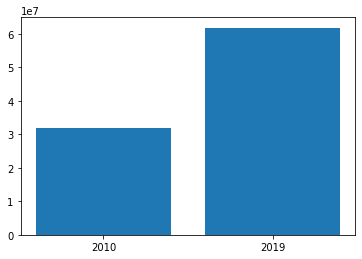

In [20]:
x1=df['Total_mT_2010'].sum()
x2=df['Total_mT_2019'].sum()
x=['2010','2019']
height = [x1,x2]
plt.bar(x,height)

Total amount of mismanaged plastic waste has doubled between 2010 and 2019 !

Global Map of mismanaged plastic waste in 2010

In [21]:
fig = px.choropleth(df,locations='country_code',color='Total_mT_2010',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,13000000),title='Total_mT_2010',height=800
    )
fig.show()

Global Map of mismanaged plastic waste in 2019

In [22]:
fig = px.choropleth(df,locations='country_code',color='Total_mT_2019',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,13000000),title='Total_mT_2010',height=800
    )
fig.show()


### 4. EDA

Top 10 countries which have mismanaged plastic waste in 2010

<AxesSubplot:xlabel='Country'>

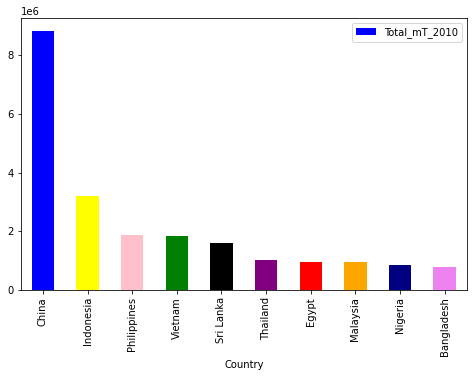

In [23]:
colors = ['blue', 'yellow', 'pink', 'green','black','purple','red','orange','navy','violet']
df.sort_values(by='Total_mT_2010', ascending=False).head(10).plot.bar(x='Country',y='Total_mT_2010',figsize=(8,5),color=colors)

8 countries are in Asia and 2 countries are in Africa out of top 10 countries in 2010.

Top 10 countries which have mismanaged plastic waste in 2019

<AxesSubplot:xlabel='Country'>

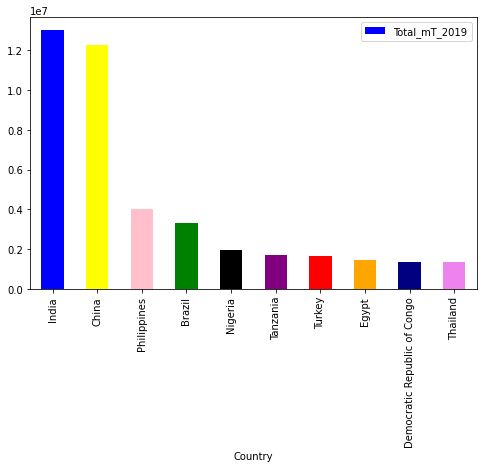

In [24]:
colors = ['blue', 'yellow', 'pink', 'green','black','purple','red','orange','navy','violet']
df.sort_values(by='Total_mT_2019', ascending=False).head(10).plot.bar(x='Country',y='Total_mT_2019',figsize=(8,5),color=colors)

5 countries are in Asia, 4 countries are in Africa and 1 country is in South America out of top 10 countries in 2019.

Top 10 countries which have increased mismanaged plastic waste between 2010 and 2019

<AxesSubplot:xlabel='Country'>

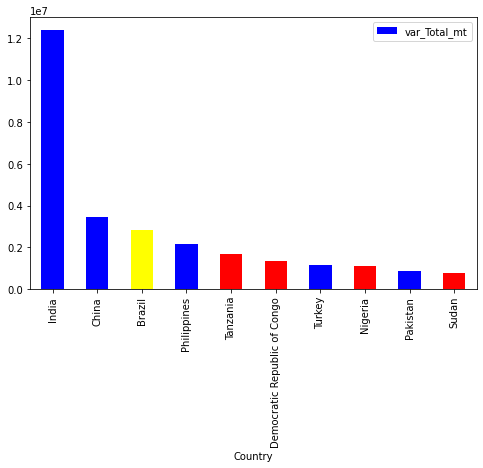

In [25]:
colors = ['blue', 'blue', 'yellow', 'blue','red','red','blue','red','blue','red']
df.sort_values(by='var_Total_mt', ascending=False).head(10).plot.bar(x='Country',y='var_Total_mt',figsize=(8,5),color=colors)

India has increased mismanaged plastic waste overwhelmingly between 2010 and 2019.

Global Map of mismanaged plastic waste per capita in 2010

In [26]:
fig = px.choropleth(df,locations='country_code',color='PerCapita_kg_2010',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,70),title='PerCapita_kg_2010',height=800
    )
fig.show()

Global Map of mismanaged plastic waste per capita in 2019

In [27]:
fig = px.choropleth(df,locations='country_code',color='PerCapita_kg_2019',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,70),title='PerCapita_kg_2019',height=800
    )
fig.show()

Top 10 countries which have mismanaged plastic waste per capita in 2010

<AxesSubplot:xlabel='Country'>

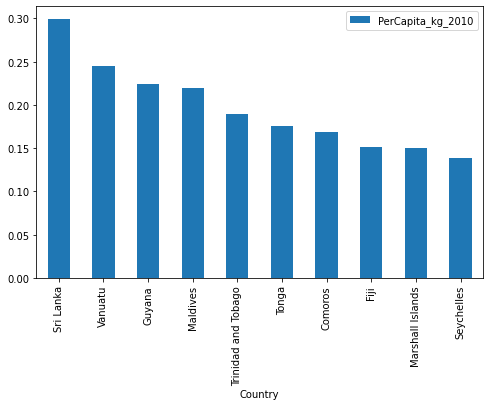

In [28]:
df.sort_values(by='PerCapita_kg_2010', ascending=False).head(10).plot.bar(x='Country',y='PerCapita_kg_2010',figsize=(8,5))

Top 10 countries which have mismanaged plastic waste per capita in 2019

<AxesSubplot:xlabel='Country'>

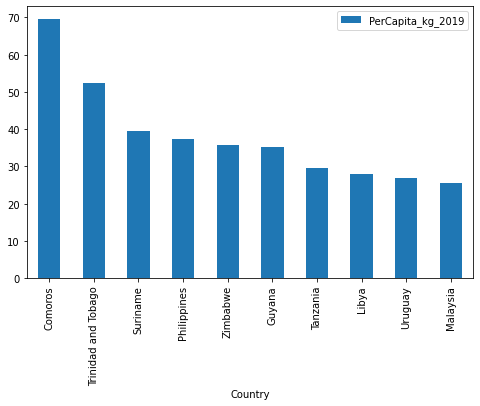

In [29]:
df.sort_values(by='PerCapita_kg_2019', ascending=False).head(10).plot.bar(x='Country',y='PerCapita_kg_2019',figsize=(8,5))

Top 10 countries which have most mismanaged plastic waste per capita increase between 2010 and 2019

df.sort_values(by='var_PerCapita', ascending=False).head(10).plot.bar(x='Country',y='var_PerCapita',figsize=(8,5))


The Comoros is a volcanic archipelago off Africa’s east coast, in the warm Indian Ocean waters of the Mozambique Channel.

Trinidad and Tobago is a dual-island Caribbean nation near Venezuela, with distinctive Creole traditions and cuisines.


I think that we have to consider some factors which have influence to plastic waste. For example, 'Comoros' and 'Trinidad and Tobago' are No1 and No2 in Top 10 countries which have most mismanaged plastic waste per capita and their increase. It may come from Plastic currents. But on the other hand, we also consider where people make plastic waste which means 'Plastic input from municipal solid waste and wastewater' and 'Plastic input into oceans'

So I look into the articles which show 'Plastic currents','Plastic input from municipal solid waste and wastewater' and 'Plastic input into oceans'.

### 1.Plastic currents

Discarded plastic moving around the ocean – on the surface, in the water column and on the sea floor – sometimes comes to rest. The geographical distribution of marine plastic debris is strongly influenced by the entry points and the different transport pathways, which are in turn determined by the density of plastic debris coupled with prevailing currents, wind and waves (Rech et al., 2014).

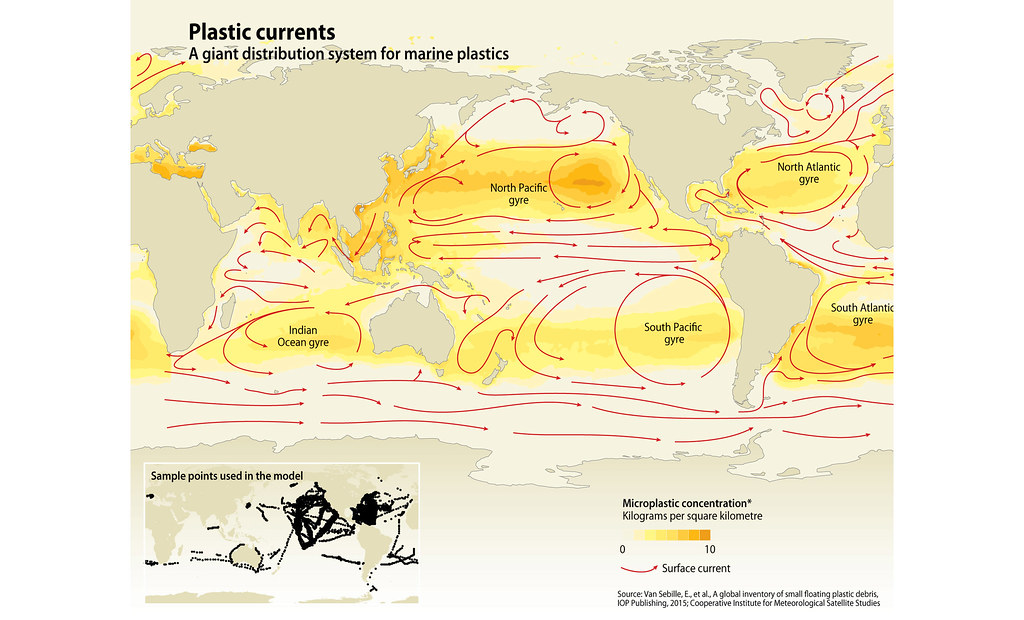

### 2.Plastic input from municipal solid waste and wastewater.

Debris released by human activity on land can be washed by surface runoff or blown by wind into rivers and other watercourses and ultimately be transported into the ocean. Debris can also be directly dumped or discharged from boats or sewage plants into rivers (Rech et al., 2014). Plastic is very efficiently transported downstream due to its near-neutral buoyancy and may reach the ocean after only a few days (Kabat et al., 2012). Rivers transport plastic debris and, because the average journey is much shorter than the time needed for plastic to degrade, the majority ultimately reaches the ocean. Debris can also become stranded on riverbanks or entangled in vegetation; it may then be remobilized by wind or surface runoff to continue its journey downstream (Williams and Simmons, 1997). During high discharge events caused by heavy rainfall or human-controlled water releases, plastic and other debris can be exported far offshore from the river mouth. Dispersal of debris is also more efficient along coasts that experience high wave energy and/or large tides or other dynamic current regimes (Galgani et al., 2000; Carson et al., 2013; Lechner et al., 2014; Rech et al., 2014).



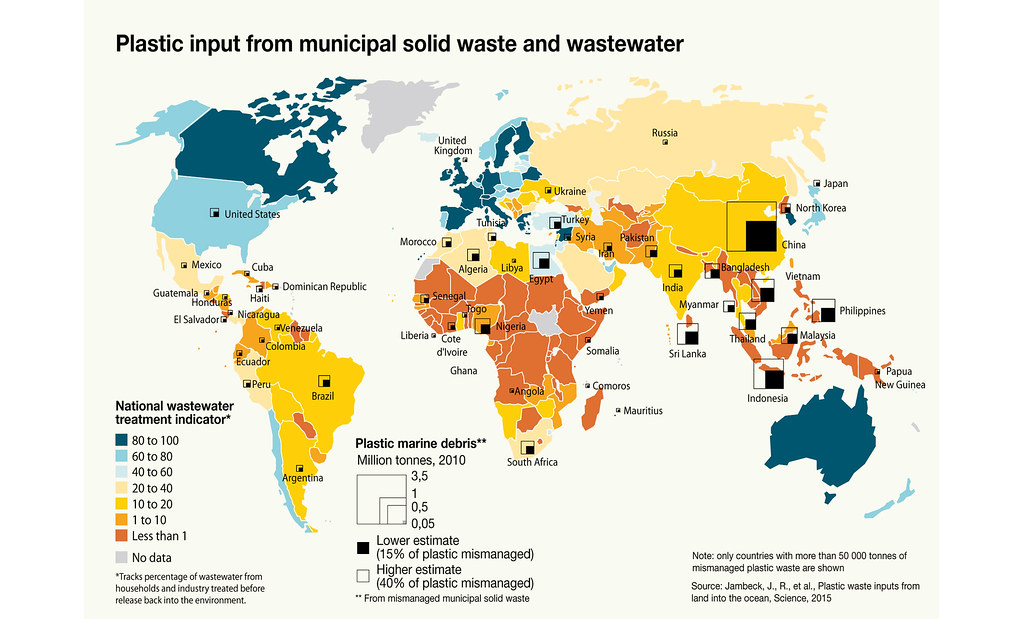

### 3.Plastic input into the oceans.

Despite knowledge of the role played by rivers, there are no global estimates of the amount of man-made debris reaching the ocean at river mouths. Therefore, of the estimated 4.8 to 12.7 million tonnes of litter which enter the marine environment in 2010 from land-based sources within a 50 km-wide coastal zone (Jambeck et al., 2015), the proportion delivered by rivers is unknown. Debris originating more than 50 km inland from the coast would also need to be added to the figures above. The quantity and composition of anthropogenic debris delivered by a particular river also depends on the intensity and character of the socio-economic activities and population density in the river basin. The implementation of environmental protection and waste treatment measures may help to reduce the leakage of debris. The distribution and extent of impervious surfaces (built-up areas) in watersheds has been used as a proxy for the input of plastic debris through watercourses, as it is directly related to both urbanization and runoff volume (Lebreton et al., 2012).



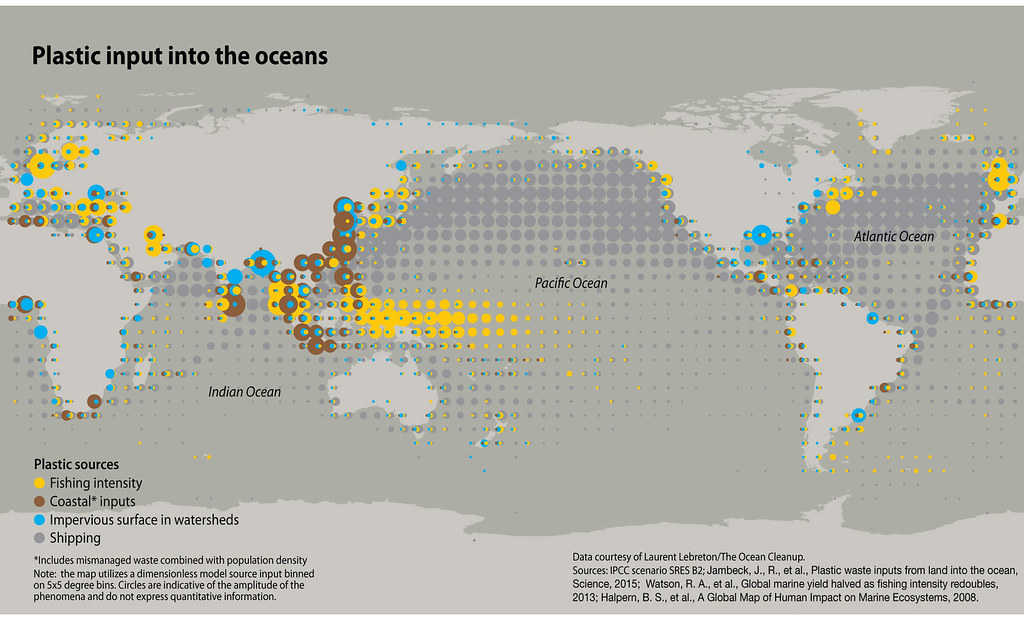

### 4. Clustering

In [30]:
df1=df.drop(['Country','country_code'],axis=1)
df1.head()

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
0          29705          69833              0.032          24.239153   
1         520555         764578              0.086          17.758995   
2          62528         236946              0.045           7.445279   
3             52              0              0.010           0.000000   
4           1253            627              0.051           6.463918   

   var_Total_mt  var_PerCapita  
0         40128      24.207153  
1        244023      17.672995  
2        174418       7.400279  
3           -52      -0.010000  
4          -626       6.412918

In [31]:
X = df1.values[:,:]

In [32]:
X

array([[2.97050000e+04, 6.98330000e+04, 3.20000000e-02, 2.42391531e+01,
        4.01280000e+04, 2.42071531e+01],
       [5.20555000e+05, 7.64578000e+05, 8.60000000e-02, 1.77589947e+01,
        2.44023000e+05, 1.76729947e+01],
       [6.25280000e+04, 2.36946000e+05, 4.50000000e-02, 7.44527887e+00,
        1.74418000e+05, 7.40027887e+00],
       ...,
       [0.00000000e+00, 4.11400000e+03, 0.00000000e+00, 7.06872852e+00,
        4.11400000e+03, 7.06872852e+00],
       [1.69181000e+05, 2.91737000e+05, 7.70000000e-02, 1.00040121e+01,
        1.22556000e+05, 9.92701207e+00],
       [0.00000000e+00, 5.24865000e+05, 0.00000000e+00, 3.58391943e+01,
        5.24865000e+05, 3.58391943e+01]])

In [33]:
from sklearn.cluster import KMeans

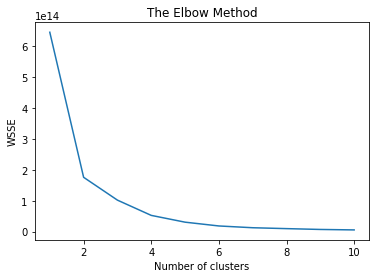

In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(df1)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [35]:
print(wsse)

[646106168759217.6, 175910315148484.6, 101888508041879.62, 52437454810187.984, 30447539935959.367, 18156652030307.113, 12411917997723.516, 9518591339275.914, 6834267362099.074, 5337914209608.031]


In [36]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4,  random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [38]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
df1['cluster']=labels
df1['Country']=df['Country']

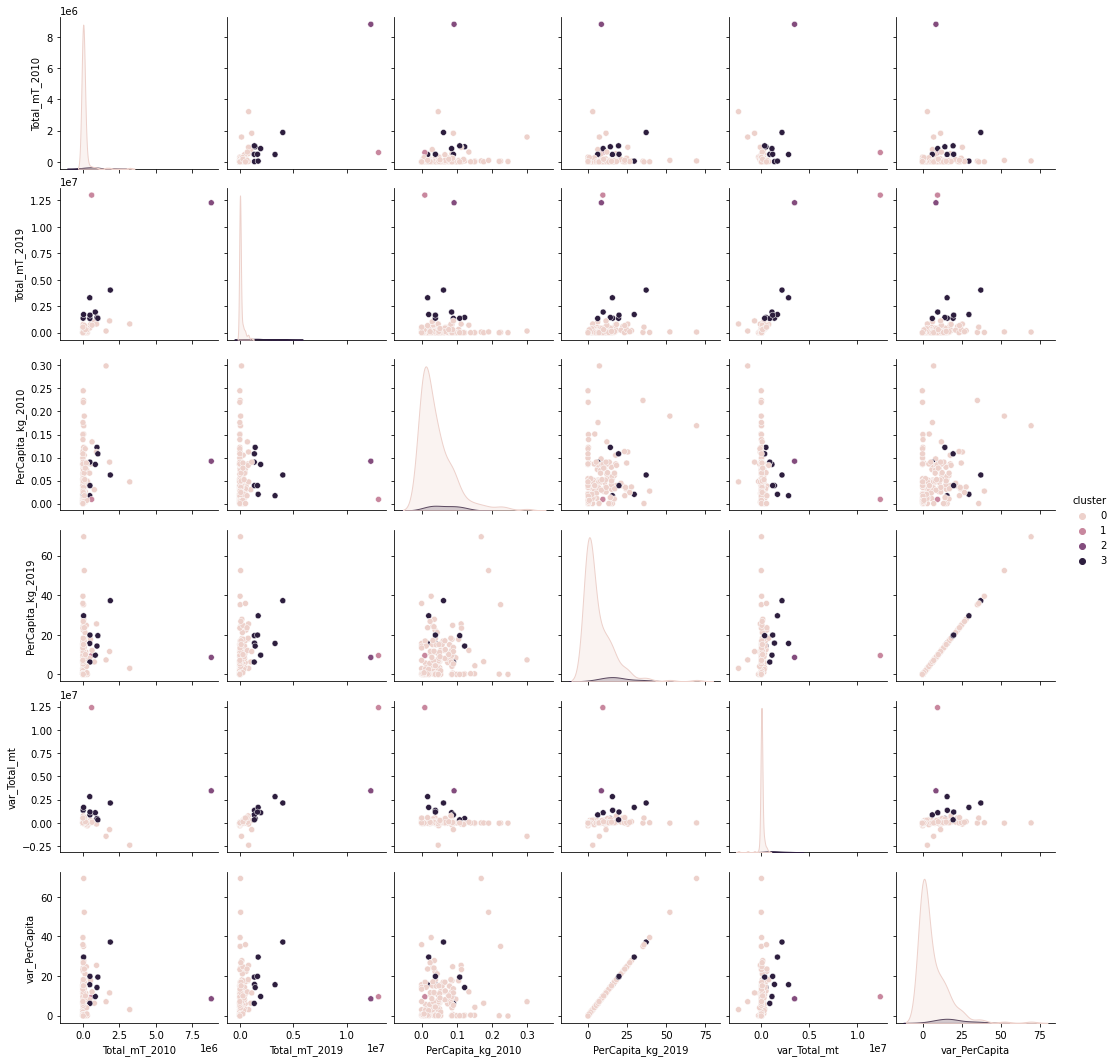

In [40]:
sns.pairplot(df1,hue='cluster')

In [41]:
df1.groupby('cluster').mean()

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
cluster                                                                       
0         8.848592e+04   1.002762e+05           0.042235           6.502469   
1         5.998190e+05   1.299410e+07           0.009000           9.509608   
2         8.819717e+06   1.227220e+07           0.092000           8.559308   
3         6.923923e+05   2.017428e+06           0.064667          18.649599   

         var_Total_mt  var_PerCapita  
cluster                               
0        1.179031e+04       6.460234  
1        1.239428e+07       9.500608  
2        3.452483e+06       8.467308  
3        1.325035e+06      18.584932

In [43]:
df1[df1['cluster']==0]

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
0            29705          69833              0.032          24.239153   
1           520555         764578              0.086          17.758995   
2            62528         236946              0.045           7.445279   
3               52              0              0.010           0.000000   
4             1253            627              0.051           6.463918   
5           157777         465808              0.026          10.401912   
6              372              0              0.007           0.000000   
7            13889           5266              0.002           0.208943   
8             1333           2212              0.011           5.686375   
9             4376           1043              0.016           0.635588   
10          787327        1021990              0.030           6.268108   
11            3483            872              0.034           3.038328   
12            2743           2284              0.002           0.197937   
13            3892           6021              0.053          15.438462   
14           43015         133335              0.036          11.298619   
15             123              0              0.005           0.000000   
16           12955          55551              0.061          16.828537   
18              55              0              0.005           0.000000   
19              93            692              0.001           1.598152   
20           18739           3117              0.051           0.445286   
21               0         317298              0.000          15.614291   
22           29686         247495              0.058          15.011524   
23           27713         578798              0.038          22.368140   
24            7959          23587              0.002           0.630483   
25            9347           3568              0.049           6.487273   
26              95              0              0.005           0.000000   
27             281              0              0.005           0.000000   
28           21754          30767              0.011           1.623417   
30               3              0              0.005           0.000000   
31               1              0              0.005           0.000000   
32           92173          85454              0.034           1.697570   
33           58032          59158              0.169          69.515864   
34           16766          65291              0.054          12.133618   
35             416           5751              0.054           0.000000   
36           42090         291614              0.047           1.139263   
37          194558          17544              0.086          11.339348   
38           16461              0              0.028           4.247942   
39           90630              0              0.022           0.000000   
40             268              0              0.005           0.000000   
41            1821            837              0.006           0.698082   
43            1791            390              0.001           0.067568   
44           17324          10289              0.076          10.563655   
45             783           1082              0.031          15.027778   
46          118226         194018              0.039          18.066673   
47          109383         108797              0.047           6.262058   
49          118732          21693              0.051           3.361171   
50            5977           9403              0.047           6.934366   
51           16259          84088              0.035          24.045754   
52            5979            600              0.019           0.452489   
53              93              0              0.005           0.000000   
54               5              0              0.005           0.000000   
55           49257           3858              0.151           4.334831   
56            4985           2

In [44]:
df1[df1['cluster']==1]

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
80         599819       12994100              0.009           9.509608   

    var_Total_mt  var_PerCapita  cluster Country  
80      12394281       9.500608        1   India

In [45]:
df1[df1['cluster']==2]

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
29        8819717       12272200              0.092           8.559308   

    var_Total_mt  var_PerCapita  cluster Country  
29       3452483       8.467308        2   China

In [46]:
df1[df1['cluster']==3]

Total_mT_2010  Total_mT_2019  PerCapita_kg_2010  PerCapita_kg_2019  \
17          471404        3296700              0.017          15.620469   
42           15208        1369730              0.039          15.781936   
48          967012        1435510              0.122          14.299617   
124         851493        1948950              0.085           9.698006   
131         480493        1346460              0.090           6.217348   
137        1883659        4025300              0.062          37.230963   
172          48586        1716400              0.020          29.590553   
173        1027739        1361690              0.108          19.557206   
180         485937        1656110              0.039          19.850294   

     var_Total_mt  var_PerCapita  cluster                       Country  
17        2825296      15.603469        3                        Brazil  
42        1354522      15.742936        3  Democratic Republic of Congo  
48         468498      14.177617        3                         Egypt  
124       1097457       9.613006        3                       Nigeria  
131        865967       6.127348        3                      Pakistan  
137       2141641      37.168963        3                   Philippines  
172       1667814      29.570553        3                      Tanzania  
173        333951      19.449206        3                      Thailand  
180       1170173      19.811294        3                        Turkey

In [47]:
df1['country_code']=df['country_code']

In [49]:
fig = px.choropleth(df1,locations='country_code',color='cluster',scope='world',
                    range_color=(0,3),title='Map by Clusters',height=800
    )
fig.show()

By clustering, I concluded that India and China play the important role in Mismanaged Plastic Waste, and south east asian countries, some african countries and Brazil are also key to reduce Mismanaged Plastic Waste. The important thing is that Mismanaged Plastic Waste is coming from not only 'Plastic input from municipal solid waste and wastewater' and 'Plastic input into oceans' but also from 'Plastic currents'. It means that plastic waste which is made in a country move to other countries. So each countries have to cooperate to cope with this problem.

### 5. The future of plastic waste

### Plastic waste produced and mismanaged
The rapid rise in the use of oil and gas during the last half century has been accompanied by the development of a range of petroleum products, some of which, like petrochemicals, have other important applications beyond energy production. The global production of petroleum-derived plastic has also increased dramatically, from 1.5 million tonnes in 1950 to more than 300 million tonnes in 2014 (Plastics Europe, 2015; Velis, 2014). Some people have described this dramatic increase in the use of plastics as the “Age of Plastics” (Stevens, 2002) or “Our Plastic Age” (Thompson et al., 2009). If the current trend where production increases by approximately 5 per cent a year continues, another 33 billion tonnes of plastic will have accumulated around the planet by 2050 (Rochman et al., 2013).

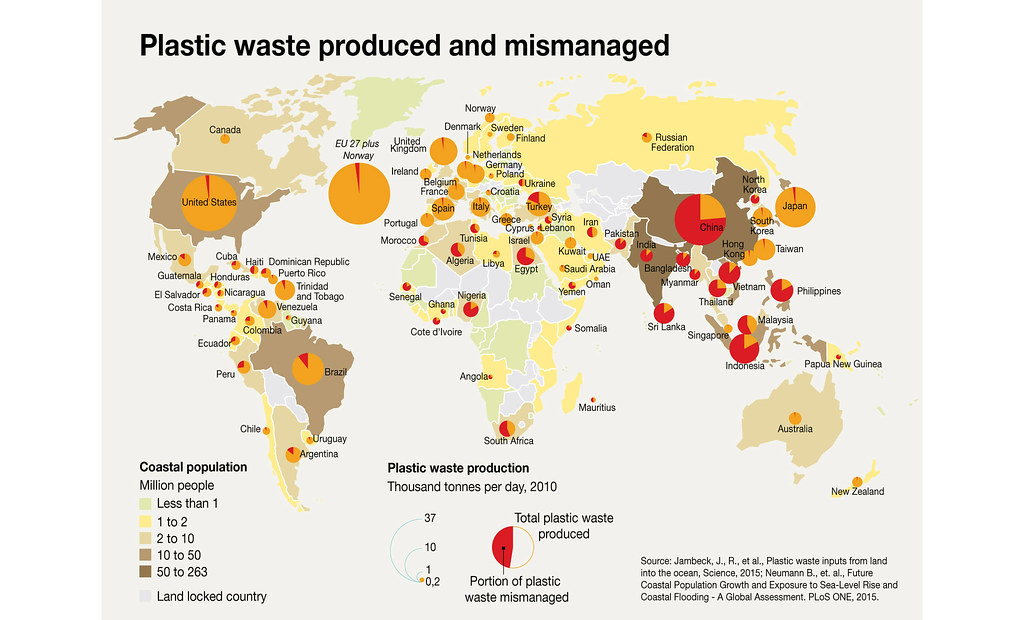